In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

import requests
import json


import os
import pandas as pd
import numpy as np

from bs4 import BeautifulSoup

from IPython.core.display import HTML, display

# Lecture 05 - JSON, XML, HTML, Requests and APIs
by Vítek Macháček, with help of Jan Šíla <br>
October 27th, 2020

video content (last semester): https://www.loom.com/share/238cd0c4842b49c1a59e055d8ddc2f87

### Contents

* Standardized data representation
* JSON
* XML
* Introduction to BeautifulSoup
* Basics of HTML (+ Element Inspection)
* Introduction to Requests (GET vs. POST) and APIs


### Goals:
    
* work with data  online/real-time data
* acquisition, processing - > results
* Today introduction and next week a practical example

## Microservice architecture

Do one thing and do it well.

![Microservice architecture schema](./img/microservice-architecture.png "Microservice Architecture")


## Date exchange formats - JSON, XML

`Language of the internet`

* More complex than simple tables
* Highly structured - if you dont follow the rules, you are out
* Both sides need to understand the structure
* only data. It does not do anything!
* programming language/machine agnostic
* distributed as text/string (to be precise as `bytes` literals) 
* parsed to objects
* Can be persisted as special files, or some data streams from APIs. 
* Human readable
* Hierarchical
* Can be fetched using standard web APIs

### Purpose

1. Communication 
    * All imaginable communication channels
    * Applications within single server/machine
    * Only transferring of data
    * Both sides need to understand the structure

2. Storing
    * self-descriptive
    * human readable
    * also in DBs - SQL, MongoDB etc.

3. Standardization
    * predictability
    * cooperation
    * spillovers from standardization


### Dimensionality problem

* rich information comes at costs of data complexity 
* to interrelate information, you need to high dimensionality (or A LOT of columns)
* Strongly object-oriented

See an example of complex data format: 
[Datex II](https://docs.datex2.eu/_static/umlmodel/v3.0/index.htm)

### 1D:
* logs

### 2D: CSVs
* tabular data

### 3+D:
#### XML
* eXtensible Markup Language is a software- and hardware-independent tool for storing and transporting data.
* Officialy defined at 1998, but its roots are even older.
* XML was designed to carry data - with focus on what data is
* HTML was designed to display data - with focus on how data looks
* XML tags are not predefined like HTML tags are
* more verbose than JSON
* can have comments
* used historically as a transaction format in many areas: 
    * Scientific measurements
    * News information
    * Wheather measurements
    * Financial transactions
* Necessary to use XML parser to use in Python or in JavaScript

### JSON
* JavaScript Object Notation
* often *.json* files
* but also used in the web etc.
* supports standard datatypes - strings, integers, floats, lists
* No comments
* More compact, less verbose
* No closing tags
* Used EVERYWHERE, BUT [NOT LICENSED FOR EVIL](https://www.json.org/license.html). If you want to do evil stuff, use XML instead.
* Native in JavaScript and close to native in Python

## Schema of XML or JSON
* defines allowed values etc.

# JSON

In [ ]:
# general representation of a dictionary
# emphasis on accessibility -> key-value ( hash table )
# contains records, lists, or other dictionaries

teachers = [{'name':'Jozef Baruník','titles':['doc.','PhDr.','Ph.D.','Bc.','Mgr.'],'ID':1234,'courses':['JEM005','JEM116','JEM059','JEM061']},
            {'name':'Martin Hronec','titles':['Bc.','Mgr.'],'ID':3421,'courses':['JEM005','JEM207']},
            {'name':'Lukáš Vácha'}]
courses = {
    'JEM005':{'name':'Advanced Econometrics','ECTS':6,'teachers':[3421,1234]},
    'JEM207':{'name':'Data Processing in Python','ECTS':5,'teachers':[3421]},
    'JEM116':{'name':'Applied Econometrics','ECTS':6,'teachers':[1234]},
    'JEM059':{'name':'Quantitative Finance I.','ECTS':6,'teachers':[1234,5678]},
    'JEM061':{'name':'Quantitative Finance II.','ECTS':6,'teachers':[1234,5678]}
}
jsondata = {'teachers':teachers,'courses':courses}
type(jsondata)

https://jsonformatter.curiousconcept.com/

In [ ]:
print(json.dumps(jsondata,indent=4,ensure_ascii=False))

![python and JSON](./img/python_json.png)
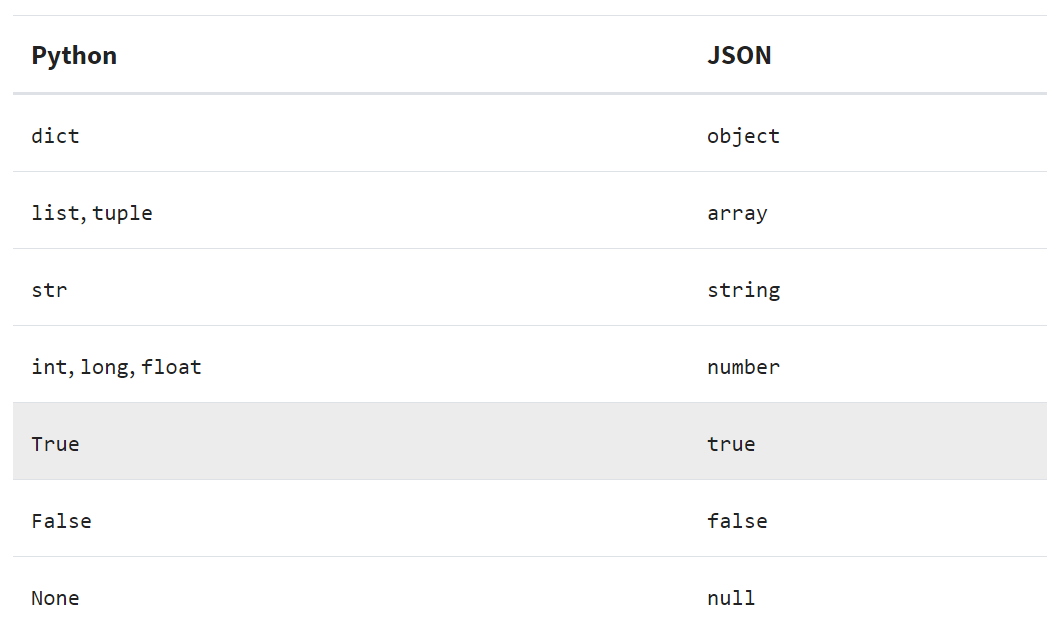

In [ ]:
type(json.dumps(jsondata['courses']))

In [ ]:
pd.read_json(json.dumps(jsondata['courses']))

In [ ]:
dfc = pd.read_json(json.dumps(jsondata['courses']),orient='index')
dfc

## GeoJSON

* One standardized data format for transferring geodata
* Plenty of geodata out there
* see for example http://opendata.iprpraha.cz/CUR/OVZ/OVZ_Klima_ZnecOvzdusi_p/WGS_84/OVZ_Klima_ZnecOvzdusi_p.json

In [ ]:
verbose_request = requests.get('http://opendata.iprpraha.cz/CUR/OVZ/OVZ_Klima_ZnecOvzdusi_p/WGS_84/OVZ_Klima_ZnecOvzdusi_p.json')
verbose_request.text[:10]

### Convert to python data-types

In [ ]:
d = requests.get('http://opendata.iprpraha.cz/CUR/OVZ/OVZ_Klima_ZnecOvzdusi_p/WGS_84/OVZ_Klima_ZnecOvzdusi_p.json').json()

In [ ]:
d['features'][9]['properties']

In [ ]:
import branca
import folium

colorscale = branca.colormap.linear.YlOrRd_09.scale(0, 5)

def style_function(feature):
    gridvalue = feature['properties']['GRIDVALUE']
    return {
        'fillOpacity': 0.5,
        'weight': 0,
        'fillColor': colorscale(gridvalue)
    }

m = folium.Map(location=[50.085,14.45],zoom_start=11)
folium.GeoJson('http://opendata.iprpraha.cz/CUR/OVZ/OVZ_Klima_ZnecOvzdusi_p/WGS_84/OVZ_Klima_ZnecOvzdusi_p.json',style_function=style_function).add_to(m)
m

In [ ]:
len(d['features'])

# eXtensible Markup Language (XML)

* elements
* attributes
* tags

### Tag
> <>

### Element

In [ ]:
#either
'''<element>content</element>'''

#or self-closing (no content)
'''<element />''';
#<br /> 

### Attributes

In [ ]:
'''<element attr="value" />''';

![XML tree structure](./img/xml_tree_structure.png)
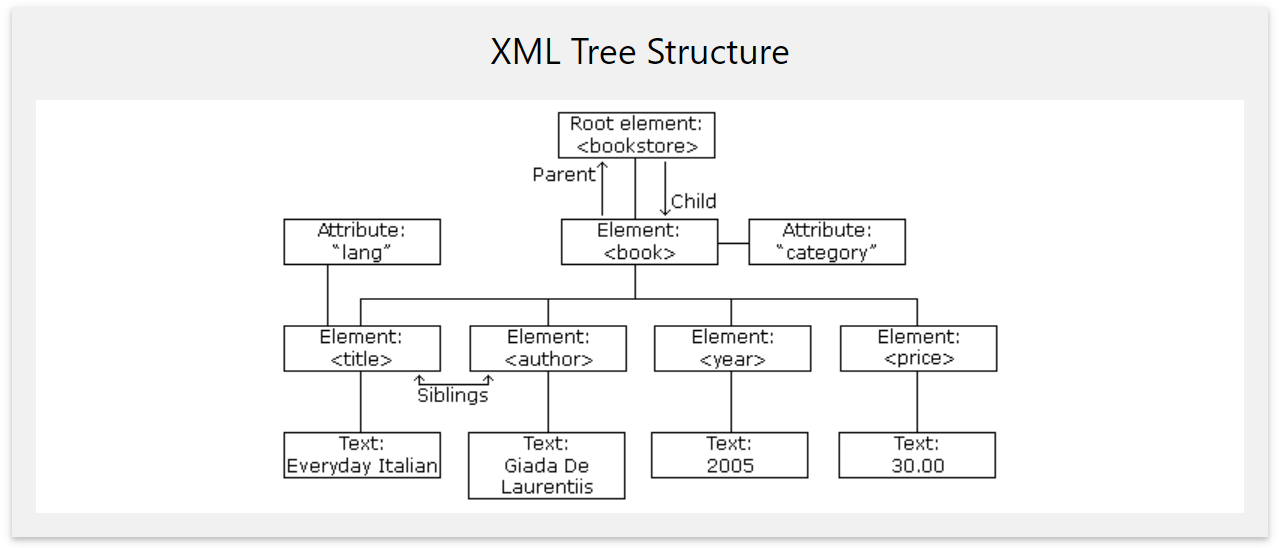

```xml
<bookstore>
    <book category="fiction">
        <title lang="ENG">Everyday Italian</title>
        <author>Giada De Laurentis</author>
        <year>2005</year>
        <price>30.00</price>
    </book>
</bookstore>
```

```json
{
    "bookstore":[
        {
            "title":"Everyday Italian",
            "lang":"ENG",
            "author":"Giada de Laurentis",
            "year":2005,
            "price":30
        }
    ]
}
```


Takeaway: JSON and XML are not equivalents and cannot be freely mirrored. Unfortunately.

## Navigation
* Xpath
* CSS selectors 
* **BeautifulSoup**

### BeatifulSoup in detail
each BS object represents
* an element
* the position in tree

In [ ]:
xml = '''
<?xml version="1.0" encoding="utf-8"?>
<ies_data>
    <courses>
        <course id="JEM005" ects="6" name="Advanced Econometrics">
            <teacher-id>3421</teacher-id>
            <teacher-id>1234</teacher-id>
        </course>
        <course id="JEM207" ects="5" name="Data Processing in Python">
            <teacher-id>3421</teacher-id>
        </course>
            <course id="JEM116" ects="6" name="Applied Econometrics I.">
            <teacher-id>1234</teacher-id>
        </course>
        <course id="JEM059" ects="6" name="Quantitative Finance I.">
            <teacher-id>1234</teacher-id>
            <teacher-id>5678</teacher-id>
        </course>
        <course id="JEM061" ects="6" name="Quantitative Finance II.">
            <teacher-id>1234</teacher-id>
            <teacher-id>5678</teacher-id>
        </course>
    </courses>
    <teachers>
        <teacher teacher-id="3421">
            <name>Martin Hronec</name>
        </teacher>
        <teacher teacher-id="1234">
            <name>Jozef Baruník</name>
        </teacher>
        <teacher teacher-id="5678">
            <name>Lukáš Vácha</name>
        </teacher>
    </teachers>
</ies_data>
'''

#unlike HTML, those tag names are defined by Vitek - no one else 'can' understand them -> flexibility

soup = BeautifulSoup(xml)

```find()``` will find a **first** element given the input

```find_all()``` or ```findAll()```  finds a **all** elements given the input

In [ ]:
jem059 = soup.find('course',{'id':'JEM059'})
type(jem059)

In [ ]:
jem059

In [ ]:
soup.findAll('teacher-id')

`soup['attr']` will return the value of attribute 

In [ ]:
jem059['ects']

In [ ]:
soup.findAll('teacher-id')

In [ ]:
jem059

you can also navigate horizontally

In [ ]:
jem059.findNext('course')

In [ ]:
jem059.findPrevious('course')

and even upstream!

In [ ]:
jem059.parent.parent

In [ ]:
[int(t.text) for t in soup.findAll('teacher-id')]

In [ ]:
course = soup.find('course')
d = {
    'id':course['id'],
    'name':course['name'],
    'ects':course['ects'],
    'teachers':[int(t.text) for t in course.findAll('teacher-id')]
}
d

### Can convert to JSON-like

In [ ]:
l = []
for course in soup.findAll('course'):
    d = {'id':course['id'],
         'name':course['name'],
         'ects':course['ects'],
         'teachers':[int(t.text) for t in course.findAll('teacher-id')]}
    l.append(d)
l

### Or in list-comprehension syntax

In [ ]:
l = [{
    'id':course['id'],
    'name':course['name'],
    'ects':course['ects'],
    'teachers':[int(t.text) for t in course.findAll('teacher-id')]
} for course in soup.findAll('course')]

In [ ]:
pd.DataFrame(l)

# HTML
standard web-page consists of:

* Browser-executed code (`front-end`)
    * HTML "DOM" structure - the website content
        * List of elements that are on website
        * Links to CSS classes, ids and
    * CSS stylesheets - website graphics
    * JavaScripts - website interactivity    

* Server-executed (`back-end`)
    * Server, database, app logic etc.
    * Not available for scraping!
    * May be available as API


## Web-scraping
* client side only
* Navigating HTML DOM by taking advantage of CSS structure

## DOM (Document Object Module):

In [ ]:
html = '''
<html>
    <head>
        <title>Sample page</title>
    <script>
        function click_button() {
            alert('Button clicked!')
        }
    </script>
    <style>
        #content div {
            color:black;
        }
        .firstRow {
            background-color:#ddd;
        }

        .normalRow {
            background-color:white;
        }
    </style>
    </head>
    
    <body>
        <div id="header">
            My page header
        </div>
        <div id="table_container">
            <table>
                <tr class="firstRow">
                    <td>name</td>
                    <td>number</td>
                </tr>
                <tr class="normalRow">
                    <td>B</td>
                    <td>2</td>
                </tr>
                <tr class="normalRow">
                    <td>C</td>
                    <td>3</td>
                </tr>
            </table>
        </div>
        <div id="button_container">
            <button id="btn" onclick="click_button()">Click Me!</button>
        </div
    </body>
</html>
'''
display(HTML(html))

In [ ]:
soup = BeautifulSoup(html,'html')
soup

In [ ]:
rows = soup.findAll('tr',{'class','normalRow'})
rows

In [ ]:
d = {}

for row in rows:
    key = row.findAll('td')[0].text
    val = int(row.findAll('td')[1].text)
    d[key] = val
pd.Series(d)

In [ ]:
pd.Series({row.findAll('td')[0].text:int(row.findAll('td')[1].text) for row in BeautifulSoup(html,'xml').findAll('tr',{'class':'normalRow'})})

In [ ]:
soup = BeautifulSoup(html,'xml')

In [ ]:
row = soup.findAll('tr',{'class':'normalRow'})[0]

In [ ]:
row.findAll('td')[0].text

In [ ]:
int(row.findAll('td')[1].text)

In [ ]:
{row.findAll('td')[0].text:int(row.findAll('td')[1].text) for row in soup.findAll('tr',{'class':'normalRow'})}

## HTML Inspection
http://ies.fsv.cuni.cz/cs/node/51

# requests and internet communication

* `Client` asks/requests questions (your Jupyter client)
* `Server` replies/serve answers (your Jupyter server)



API = *Application Programming Interface*

very general term! Not only used in web communication

## HTTP requests

A most standard webserver communication channel around

A standard HTTP request contains:

* URL 

    * domain
    * route
    * parameters

* Request Type - GET, POST, PUT, DELETE (see below)

* Content specification - 
    * Application/JSON
    * Application/XML
    * text/html
    * text/css

* Content

* Outcoming data (will see below)

* Cookies 

* Status Code:

    * 200 - success
    * 404 - resource does not exist
    * 500 - the server failed during processing your request


1) REST API - use HTTP request and returns JSON

2) SOAP API - use HTTP request and returns XML

3) Website - use HTTP request and returns set of HTML, JavaScript, CSS and other files

### When to use?
* whenever more applications need to communicate
* user-friendly interface for complicated tasks - DEEP AI, Google Maps
* Data - Golemio, OpenStreetMaps

### GET request
* fast
* public
* data flow only one direction
* parameters via request adress

> https://www.google.com/search?q=how+to+understand+url+parameters&rlz=1C1GCEU_csCZ860CZ860&oq=how+to+understand+url+parameters&aqs=chrome..69i57j33i22i29i30l7.5237j0j4&sourceid=chrome&ie=UTF-8


In [ ]:
r = requests.get('https://cs.wikipedia.org/wiki/Institut_ekonomick%C3%BDch_studi%C3%AD_Fakulty_soci%C3%A1ln%C3%ADch_v%C4%9Bd_Univerzity_Karlovy')
r.text

### POST request
* slow
* private
* both sides can send data

In [ ]:
?requests.post

## Static pages x Dynamic pages x JavaScript-rendered pages

### Static

* pages that do not get updated instantly
* all information necessary for rendering a website is available after entering the URL
* It may ask the database, but the output is stable.
* all parameters within the adress!
* Typical example:
    
### JavaScript rendered: 
* Defacto static, but you cannot take advantage of HTML/CSS structure

### Dynamic content
* webpage instantly communicates with the webserver and the database
* 
* solution -> Selenium!

### Is this website static or dynamic?

1. Facebook
2. Sreality.cz
3. IES website



## How to chose data source for project

You need to know in advance what data you will download:

1. full or satisfactory access to API
2. the web-page is parsable (prefer not too much javascript)
3. plan to generate all requests

# APIs Example
### Get wiki data using GET

In [ ]:
response = requests.get('https://en.wikipedia.org/wiki/Charles_University')
soup = BeautifulSoup(response.text)
div = soup.find('div',{'id':'mw-content-text'}) #  #mw-content-text > div > p:nth-child(10)texts)
article = ' '.join([p.text for p in div.find_all('p')])
article

### Ask DeepAI using POST request

To make this work you will need to edit `.env-example` file in this directory and replace `

In [ ]:
try:
    from dotenv import load_dotenv ## 
    load_dotenv('.env')
    API_KEY = os.getenv('DEEPAI_API_KEY')
    if API_KEY is None:
        raise Exception
except:
    API_KEY = 'FILL-IN-YOUR-DEEPAI-API-KEY-HERE'

In [ ]:
r = requests.post(
    "https://api.deepai.org/api/summarization",
    data={
        'text': article,
    },
    headers={'api-key':API_KEY }
)
r.json()['output']

# Bonus example:

<img src="http://ies.fsv.cuni.cz/default/file/get/id/31996" height="500" width="300">

In [ ]:
img = 'http://ies.fsv.cuni.cz/default/file/get/id/31996'
r = requests.post(
    "https://api.deepai.org/api/demographic-recognition",
    data={
        'image': img,
    },
    headers={'api-key': API_KEY} 
r.json()


In [ ]:
r = requests.post(
    "https://api.deepai.org/api/nsfw-detector",
    data={
        'image': img,
    },
    headers={'api-key': API_KEY}
)
r.json()


In [ ]:
r = requests.post(
    "https://api.deepai.org/api/celebrity-recognition",
    data={
        'image': img,
    },
    headers={'api-key': API_KEY}
)
r.json()
